In [1]:
#### 1.Loading_data_for_Clinical_data_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
table(Cluster.df$dynamicColors)



     blue     brown turquoise    yellow 
      103        47       135         1 

Loading required package: survminer
Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr


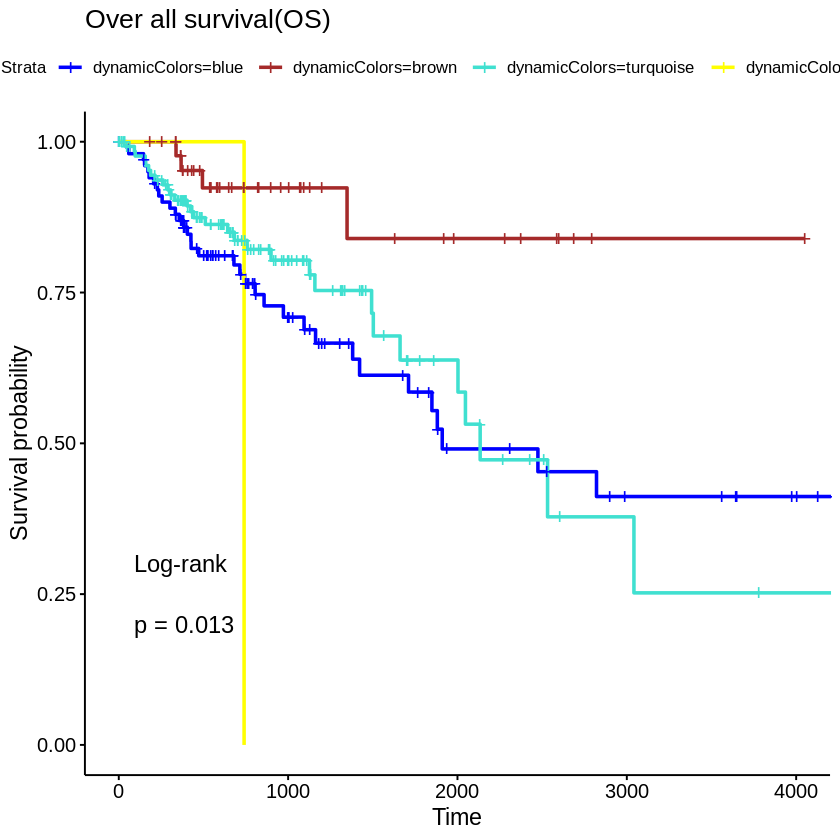

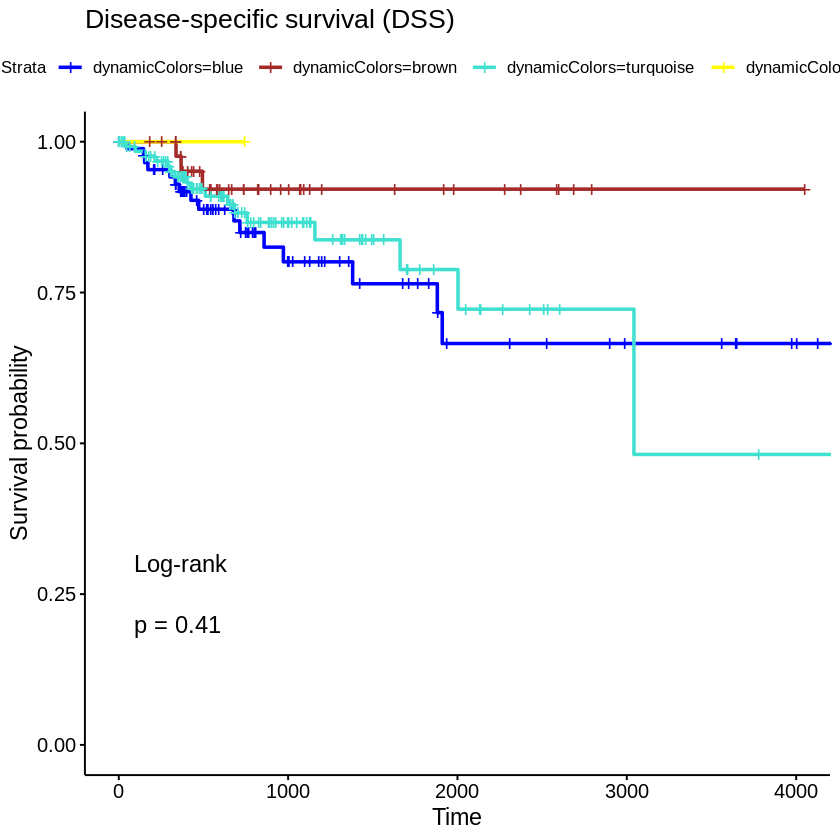

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

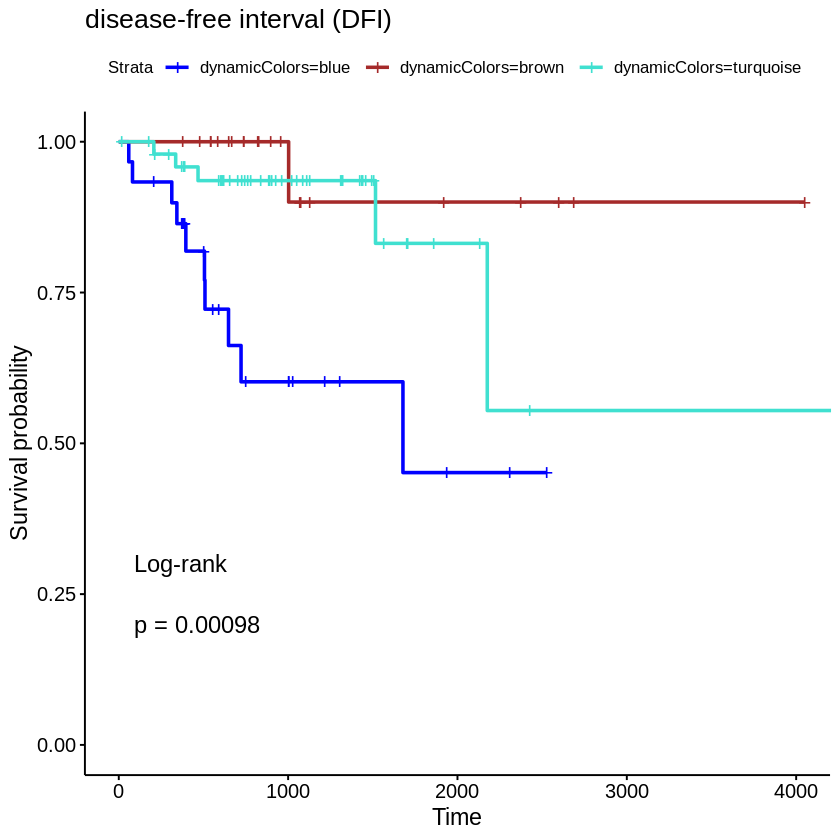

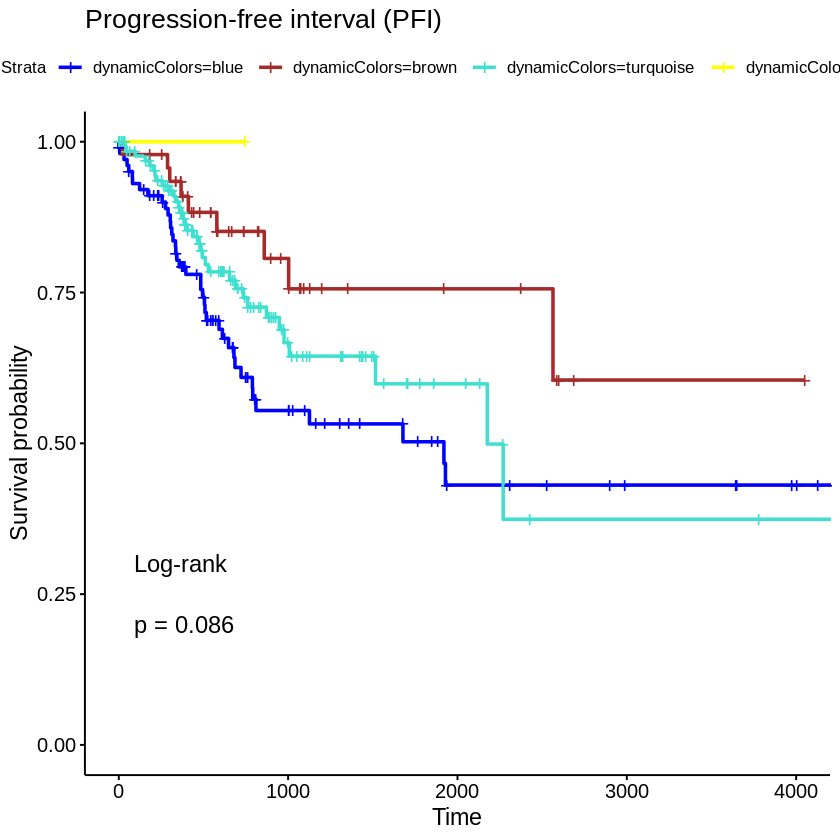

In [2]:
#### 3.Survival_data_analysis.R
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
# Paper:An Integrated TCGA Pan-Cancer Clinical Data Resource (TCGA-CDR) to drive high quality survival outcome analytics
## 1.Read data
COAD_Survival_SupplementalTabl_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/TCGA_Survival_data/COAD_Survival_SupplementalTabl_dataset.rds")
#COAD_Survival_SupplementalTabl_dataset$COAD.Survival_SupplementalTable.metadata
COAD.Survival_SupplementalTable.xena <- COAD_Survival_SupplementalTabl_dataset$COAD.Survival_SupplementalTable.xena
## 2.Merge table
MergeTable.survival <- dplyr::left_join(Cluster.df, COAD.Survival_SupplementalTable.xena, by = "rownames")
## 3.Survival plotting
require(survminer)
library("survival")
require("survival")
fitOS <- survfit(Surv(OS.time, OS) ~ dynamicColors, data = MergeTable.survival)
fitDSS <- survfit(Surv(DSS.time, DSS) ~ dynamicColors, data = MergeTable.survival)
fitDFI <- survfit(Surv(DFI.time, DFI) ~ dynamicColors, data = MergeTable.survival)
fitPFI <- survfit(Surv(PFI.time, PFI) ~ dynamicColors, data = MergeTable.survival)
# Drawing curves
color <- as.character(unique(MergeTable.survival$dynamicColors))
#ggsurvplot(fitOS,pval = T,pval.method = T,title = "Over all survival(OS)",  palette =sort(color))

title <- c("Over all survival(OS)", "Disease-specific survival (DSS)",
           "disease-free interval (DFI)","Progression-free interval (PFI)")
ggsurvplot_list(list(fitOS,fitDSS,fitDFI,fitPFI), MergeTable.survival, title = title, risk.table=F,
                pval = T,pval.method = T,
                palette = sort(color))
